In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import timedelta

%matplotlib inline
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']


## read data

In [2]:
df1=pd.read_csv('2802563.csv')
df2=pd.read_csv('2802568.csv')
df3=pd.read_csv('2802569.csv')
df4=pd.read_csv('2802570.csv')

In [3]:
df1

,STATION,DATE,DEWP,FRSHTT,GUST,MAX,MIN,MXSPD,PRCP,SLP,SNDP,STP,TEMP,VISIB,WDSP
0,44386099999,2010-01-01,-8.5,1000,999.9,-2.9,-13.9,999.9,99.99,1028.8,999.9,999.9,-7.5,999.9,0.0
1,44386099999,2010-01-02,-3.5,1000,999.9,-0.9,-6.2,15.5,99.99,1023.8,999.9,999.9,-2.4,999.9,7.3
2,44386099999,2010-01-03,-13.9,1000,999.9,-6.3,-25.8,27.2,99.99,1037.9,999.9,999.9,-12.9,999.9,9.7
3,44386099999,2010-01-04,-19.8,0,999.9,-15.5,-20.2,5.8,0.00,1044.1,999.9,911.0,-18.8,999.9,1.5
4,44386099999,2010-01-05,-19.8,0,999.9,-15.7,-22.7,3.9,0.00,1043.5,999.9,910.6,-18.9,999.9,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247889,44358099999,2020-12-28,-20.5,0,999.9,-2.9,-26.9,7.8,0.00,1053.0,2.0,921.1,-13.2,31.1,6.1
247890,44358099999,2020-12-29,-27.2,0,999.9,-10.1,-28.1,9.7,0.00,1058.1,2.0,924.0,-19.1,31.1,6.1
247891,44358099999,2020-12-30,-18.3,0,999.9,-2.7,-24.7,13.6,0.00,1047.6,1.6,917.6,-8.8,31.1,9.0
247892,44358099999,2020-12-31,-16.9,0,999.9,6.1,-18.8,9.7,0.00,1037.7,1.6,909.0,-8.7,31.1,4.6


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247894 entries, 0 to 247893
Data columns (total 15 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   STATION  247894 non-null  int64  
 1   DATE     247894 non-null  object 
 2   DEWP     247894 non-null  float64
 3   FRSHTT   247894 non-null  int64  
 4   GUST     247894 non-null  float64
 5   MAX      247894 non-null  float64
 6   MIN      247894 non-null  float64
 7   MXSPD    247894 non-null  float64
 8   PRCP     247894 non-null  float64
 9   SLP      247894 non-null  float64
 10  SNDP     247894 non-null  float64
 11  STP      247894 non-null  float64
 12  TEMP     247894 non-null  float64
 13  VISIB    247894 non-null  float64
 14  WDSP     247894 non-null  float64
dtypes: float64(12), int64(2), object(1)
memory usage: 28.4+ MB


t=df1[df1['DATE']==df1['DATE'].max()]

t

g=t.groupby(['STATION']).mean()

g

In [5]:
def jh(df): 
    df.replace([9999.9,999.9,99.9,99.99],np.nan,inplace=True)
    df.fillna(method='ffill',inplace=True)
    df.fillna(method='bfill',inplace=True)
    df.loc[:,'DATE']=df.loc[:,'DATE'].apply(pd.to_datetime)
    df['DATE']=df['DATE'].apply(lambda x:x.strftime('%Y'))
    t=df[df['DATE']==df['DATE'].max()]
    t=t.groupby('STATION').mean()
    return t

In [6]:
#python记录时间信息练习
import time
t0=time.time()
print('显示程序开始的时间:',time.strftime('%Y-%m-%d %H:%M:%S',time.localtime(time.time())))

rst=pd.DataFrame()
for i in [df1,df2,df3,df4]:
    rst=pd.concat([jh(i),rst],axis=0)
    
t1=time.time()
print('显示程序结束的时间:',time.strftime('%Y-%m-%d %H:%M:%S',time.localtime(time.time())))
print("用时：%.6fs"%(t1-t0))

显示程序开始的时间: 2021-11-29 01:18:01
显示程序结束的时间: 2021-11-29 01:19:19
用时：77.986564s


In [7]:
rst

,DEWP,FRSHTT,GUST,MAX,MIN,MXSPD,PRCP,SLP,SNDP,STP,TEMP,VISIB,WDSP
STATION,,,,,,,,,,,,,
30967099999,-11.5,0,NaN,3.2,-20.2,1.9,0.0,1037.2,36.2,978.6,-10.2,31.1,0.0
44212099999,-29.5,1000,NaN,-20.2,-36.4,5.8,0.0,1056.3,2.0,980.2,-23.8,20.1,1.1
44213199999,-32.2,0,NaN,-18.4,-56.2,3.9,0.0,1057.8,7.1,980.2,-28.6,28.0,0.0
44214099999,-6.6,0,NaN,6.8,-16.6,9.7,0.0,1043.5,59.1,980.2,-2.9,12.4,4.4
44217099999,-12.6,0,NaN,3.2,-14.8,5.8,0.0,1040.5,3.1,980.2,-9.0,17.1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44358099999,-19.9,0,27.2,-2.2,-21.3,5.8,0.0,1040.1,2.0,909.5,-14.4,31.1,3.4
44373099999,-11.4,0,31.1,12.4,-10.8,7.8,0.0,1039.9,0.8,854.0,-1.2,28.7,4.9
44374099999,-10.8,0,25.3,15.3,0.0,9.7,0.0,1036.1,0.4,825.8,6.8,31.1,4.7


In [8]:
rst.drop('GUST',axis=1,inplace=True)
rst.drop('SNDP',axis=1,inplace=True)
rst['delta']=(rst['MAX']-rst['MIN'])/1.8
rst.drop('MAX',axis=1,inplace=True)
rst.drop('MIN',axis=1,inplace=True)
rst.drop('STP',axis=1,inplace=True)
rst.drop('SLP',axis=1,inplace=True)
rst.drop('TEMP',axis=1,inplace=True)

In [9]:
rst.drop('FRSHTT',axis=1,inplace=True)

In [10]:
rst

,DEWP,MXSPD,PRCP,VISIB,WDSP,delta
STATION,,,,,,
30967099999,-11.5,1.9,0.0,31.1,0.0,13.000000
44212099999,-29.5,5.8,0.0,20.1,1.1,9.000000
44213199999,-32.2,3.9,0.0,28.0,0.0,21.000000
44214099999,-6.6,9.7,0.0,12.4,4.4,13.000000
44217099999,-12.6,5.8,0.0,17.1,0.0,10.000000
...,...,...,...,...,...,...
44358099999,-19.9,5.8,0.0,31.1,3.4,10.611111
44373099999,-11.4,7.8,0.0,28.7,4.9,12.888889
44374099999,-10.8,9.7,0.0,31.1,4.7,8.500000


D:\anaconda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


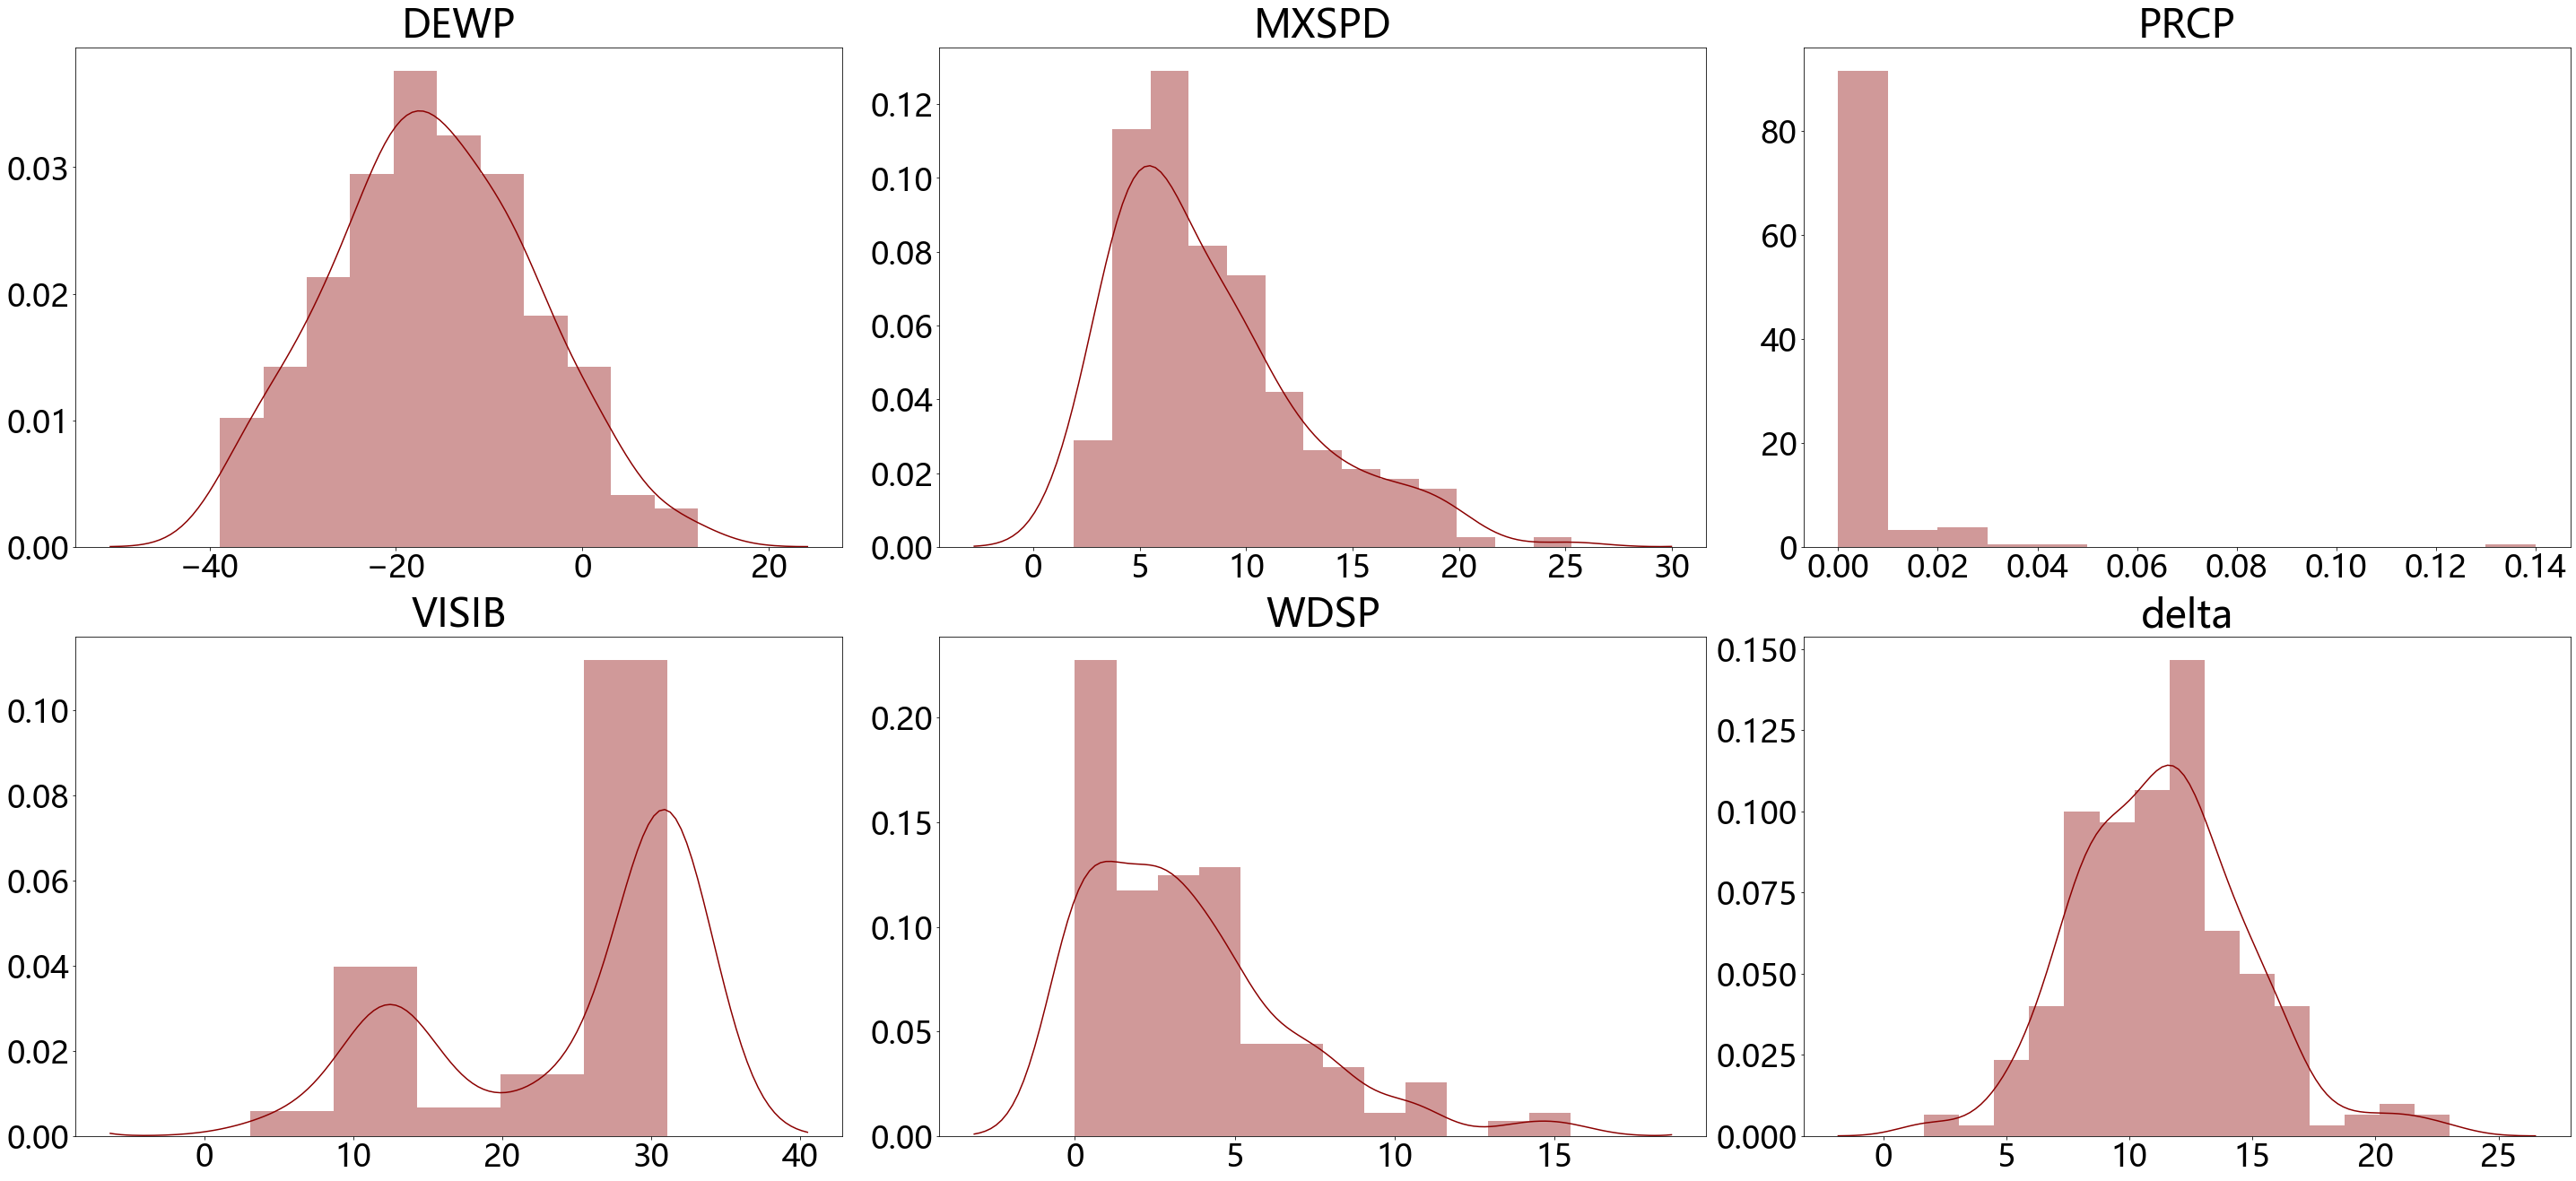

In [11]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (40, 20))
for ax, column in zip(axes.flatten(), rst.columns):
    sns.distplot(rst[column], ax = ax, color = 'darkred')
    ax.set_title(column, fontsize = 43)
    ax.tick_params(axis = 'both', which = 'major', labelsize = 35)
    ax.tick_params(axis = 'both', which = 'minor', labelsize = 35)
    ax.set_xlabel('')
fig.tight_layout(rect = [0, 0.03, 1, 0.95])

In [12]:
'''本单元格代码来自于https://github.com/Glitchfix/TOPSIS-Python
贡献TOPSIS源代码'''

import numpy as np
import warnings


class Topsis():
    evaluation_matrix = np.array([])  # Matrix
    weighted_normalized = np.array([])  # Weight matrix
    normalized_decision = np.array([])  # Normalisation matrix
    M = 0  # Number of rows
    N = 0  # Number of columns

    '''
	Create an evaluation matrix consisting of m alternatives and n criteria,
	with the intersection of each alternative and criteria given as {\displaystyle x_{ij}}x_{ij},
	we therefore have a matrix {\displaystyle (x_{ij})_{m\times n}}(x_{{ij}})_{{m\times n}}.
	'''

    def __init__(self, evaluation_matrix, weight_matrix, criteria):
        # M×N matrix
        self.evaluation_matrix = np.array(evaluation_matrix, dtype="float")

        # M alternatives (options)
        self.row_size = len(self.evaluation_matrix)

        # N attributes/criteria
        self.column_size = len(self.evaluation_matrix[0])

        # N size weight matrix
        self.weight_matrix = np.array(weight_matrix, dtype="float")
        self.weight_matrix = self.weight_matrix/sum(self.weight_matrix)
        self.criteria = np.array(criteria, dtype="float")

    '''
	# Step 2
	The matrix {\displaystyle (x_{ij})_{m\times n}}(x_{{ij}})_{{m\times n}} is then normalised to form the matrix
	'''

    def step_2(self):
        # normalized scores
        self.normalized_decision = np.copy(self.evaluation_matrix)
        sqrd_sum = np.zeros(self.column_size)
        for i in range(self.row_size):
            for j in range(self.column_size):
                sqrd_sum[j] += self.evaluation_matrix[i, j]**2
        for i in range(self.row_size):
            for j in range(self.column_size):
                self.normalized_decision[i,
                                         j] = self.evaluation_matrix[i, j]/(sqrd_sum[j]**0.5)

    '''
	# Step 3
	Calculate the weighted normalised decision matrix
	'''

    def step_3(self):
        from pdb import set_trace
        self.weighted_normalized = np.copy(self.normalized_decision)
        for i in range(self.row_size):
            for j in range(self.column_size):
                self.weighted_normalized[i, j] *= self.weight_matrix[j]

    '''
	# Step 4
	Determine the worst alternative {\displaystyle (A_{w})}(A_{w}) and the best alternative {\displaystyle (A_{b})}(A_{b}):
	'''

    def step_4(self):
        self.worst_alternatives = np.zeros(self.column_size)
        self.best_alternatives = np.zeros(self.column_size)
        for i in range(self.column_size):
            if self.criteria[i]:
                self.worst_alternatives[i] = min(
                    self.weighted_normalized[:, i])
                self.best_alternatives[i] = max(self.weighted_normalized[:, i])
            else:
                self.worst_alternatives[i] = max(
                    self.weighted_normalized[:, i])
                self.best_alternatives[i] = min(self.weighted_normalized[:, i])

    '''
	# Step 5
	Calculate the L2-distance between the target alternative {\displaystyle i}i and the worst condition {\displaystyle A_{w}}A_{w}
	{\displaystyle d_{iw}={\sqrt {\sum _{j=1}^{n}(t_{ij}-t_{wj})^{2}}},\quad i=1,2,\ldots ,m,}
	and the distance between the alternative {\displaystyle i}i and the best condition {\displaystyle A_{b}}A_b
	{\displaystyle d_{ib}={\sqrt {\sum _{j=1}^{n}(t_{ij}-t_{bj})^{2}}},\quad i=1,2,\ldots ,m}
	where {\displaystyle d_{iw}}d_{{iw}} and {\displaystyle d_{ib}}d_{{ib}} are L2-norm distances 
	from the target alternative {\displaystyle i}i to the worst and best conditions, respectively.
	'''

    def step_5(self):
        self.worst_distance = np.zeros(self.row_size)
        self.best_distance = np.zeros(self.row_size)

        self.worst_distance_mat = np.copy(self.weighted_normalized)
        self.best_distance_mat = np.copy(self.weighted_normalized)

        for i in range(self.row_size):
            for j in range(self.column_size):
                self.worst_distance_mat[i][j] = (self.weighted_normalized[i][j]-self.worst_alternatives[j])**2
                self.best_distance_mat[i][j] = (self.weighted_normalized[i][j]-self.best_alternatives[j])**2
                
                self.worst_distance[i] += self.worst_distance_mat[i][j]
                self.best_distance[i] += self.best_distance_mat[i][j]

        for i in range(self.row_size):
            self.worst_distance[i] = self.worst_distance[i]**0.5
            self.best_distance[i] = self.best_distance[i]**0.5

    '''
	# Step 6
	Calculate the similarity
	'''

    def step_6(self):
        np.seterr(all='ignore')
        self.worst_similarity = np.zeros(self.row_size)
        self.best_similarity = np.zeros(self.row_size)

        for i in range(self.row_size):
            # calculate the similarity to the worst condition
            self.worst_similarity[i] = self.worst_distance[i] / \
                (self.worst_distance[i]+self.best_distance[i])

            # calculate the similarity to the best condition
            self.best_similarity[i] = self.best_distance[i] / \
                (self.worst_distance[i]+self.best_distance[i])
    
    def ranking(self, data):
        return [i+1 for i in data.argsort()]

    def rank_to_worst_similarity(self):
        # return rankdata(self.worst_similarity, method="min").astype(int)
        return self.ranking(self.worst_similarity)

    def rank_to_best_similarity(self):
        # return rankdata(self.best_similarity, method='min').astype(int)
        return self.ranking(self.best_similarity)

    def calc(self):
        print("Step 1\n", self.evaluation_matrix, end="\n\n")
        self.step_2()
        print("Step 2\n", self.normalized_decision, end="\n\n")
        self.step_3()
        print("Step 3\n", self.weighted_normalized, end="\n\n")
        self.step_4()
        print("Step 4\n", self.worst_alternatives,
              self.best_alternatives, end="\n\n")
        self.step_5()
        print("Step 5\n", self.worst_distance, self.best_distance, end="\n\n")
        self.step_6()
        print("Step 6\n", self.worst_similarity,
              self.best_similarity, end="\n\n")


In [13]:
a=pd.DataFrame(rst)
w=[0.055065,0.243209,0.071674,0.151875,0.191424,0.286752]

In [14]:
matrix=a
weights=np.array(w)
criterias=[False,False,True,True,False,False]#确定各个变量的正向行和负向性，True为正向性变量，False为负向性变量
t = Topsis(matrix, weights, criterias)
t.calc()
a=t.rank_to_best_similarity()#按照与最优解的距离来排名
print(a)

Step 1
 [[-11.5          1.9          0.          31.1          0.
   13.        ]
 [-29.5          5.8          0.          20.1          1.1
    9.        ]
 [-32.2          3.9          0.          28.           0.
   21.        ]
 ...
 [-10.8          9.7          0.          31.1          4.7
    8.5       ]
 [-13.4          7.8          0.          31.1          7.3
   13.66666667]
 [-17.8         17.5          0.          18.6          7.3
   10.77777778]]

Step 2
 [[-0.04086785  0.01403583  0.          0.08201722  0.          0.07568773]
 [-0.10483492  0.04284621  0.          0.05300792  0.01573862  0.0523992 ]
 [-0.11442998  0.02881038  0.          0.07384187  0.          0.1222648 ]
 ...
 [-0.03838024  0.07165659  0.          0.08201722  0.06724683  0.04948813]
 [-0.04761993  0.05762076  0.          0.08201722  0.1044472   0.07956915]
 [-0.06325632  0.12927735  0.          0.0490521   0.1044472   0.06274966]]

Step 3
 [[-0.00225039  0.00341364  0.          0.01245638  0.     

In [15]:
d=pd.DataFrame({'score':t.worst_similarity},index=rst.index)
d['score'].sort_values(ascending=False)#按得分排名

STATION
44265099999    0.792631
44272099999    0.548924
44294099999    0.544756
44385099999    0.515196
44291099999    0.511593
                 ...   
44314099999    0.250907
44275099999    0.248459
44348099999    0.244281
44352099999    0.236985
44277099999    0.232718
Name: score, Length: 211, dtype: float64

In [16]:
dn=pd.read_csv('Mongolia stations.csv')

In [17]:
dn

,STATION_ID,STATION,BEGIN_DATE,END_DATE,STATE,COUNTRY,LATITUDE,LONGITUDE,ELEVATION
0,44277099999,ALTAI,1956/9/15,2020/4/7,NaN,MG,46.400000,96.250000,2181.0
1,44329099999,AMARBUYANTAYN,1973/10/4,2020/4/7,NaN,MG,44.616667,98.700000,2103.0
2,44288099999,ARVAIHEER,1957/3/24,2020/4/7,NaN,MG,46.266667,102.783333,1813.0
3,44265099999,BAITAG,1963/3/1,2020/4/7,NaN,MG,46.116667,91.466667,1186.0
4,44305099999,BARUUN-URT,1960/1/5,2020/4/7,NaN,MG,46.683333,113.283333,981.0
...,...,...,...,...,...,...,...,...,...
73,44243099999,ULYGAIIN DUGANG,1973/1/2,2020/4/7,NaN,MG,49.833333,107.733333,883.0
74,44304099999,UNDERKHAAN,1956/9/8,2020/4/7,NaN,MG,47.316667,110.633333,1033.0
75,44386099999,KHATANBULAG,1973/6/15,2020/4/7,NaN,MG,43.183333,109.216667,213.0
76,44219099999,URGAMAL,1975/1/9,2020/4/7,NaN,MG,48.516667,94.300000,1263.0


In [18]:
dict={}
for i in range(len(dn)):
    dict[dn.loc[i,'STATION_ID']]=dn.loc[i,'STATION']

In [19]:
d.index=d.index.map(dict)

In [20]:
d['score'].sort_values(ascending=False)#按得分排名

STATION
BAITAG             0.792631
ULIASTAI           0.548924
MAANTI             0.544756
HANBOGD            0.515196
SONGIIN            0.511593
                     ...   
MATAD              0.250907
BAYANBULAG         0.248459
BAYAN DOBO SUMA    0.244281
BAYANDELGER        0.236985
ALTAI              0.232718
Name: score, Length: 211, dtype: float64

In [21]:
d[d['score']<0.35]

,score
STATION,
CHOIBALSAN,0.328101
ALTAI,0.232718
UNDERKHAAN,0.307862
BAYANDELGER,0.236985
CHOIBALSAN,0.345336
BAYAN-OVOO,0.286480
UNDERKHAAN,0.330258
BARUUN-URT,0.326888
MATAD,0.250907


In [22]:
len(d[d['score']<0.35])

21

In [23]:
d.to_csv('foreign_score.csv')